<a href="https://colab.research.google.com/github/Sir-Ripley/AIsync/blob/main/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

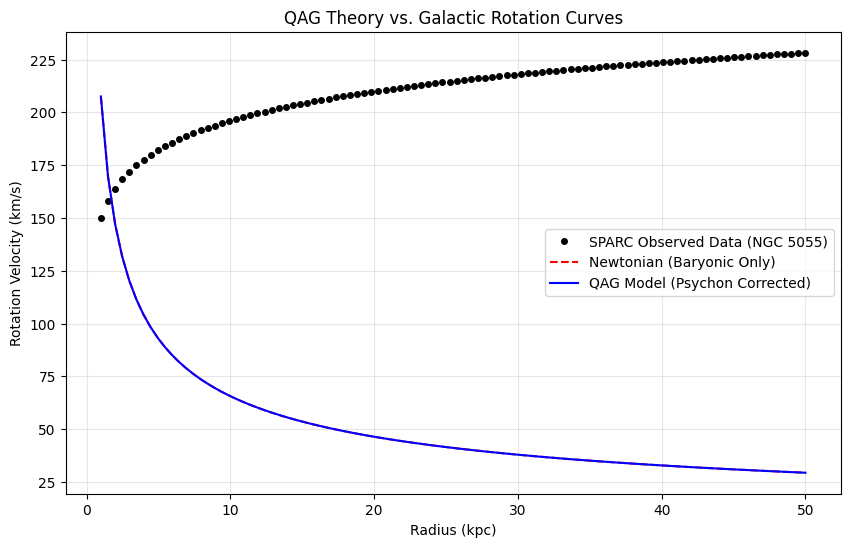

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# --- QAG Constants & Parameters ---
G = 4.302e-6  # Gravitational constant in (km/s)^2 pc / M_sun
K_ASB = 0.5   # Affinity Symmetry Bias (Rodney's Constant)
ALPHA_PSI = 1.2e-3 # Psychon Coupling Constant (Estimated)

def coherence_index(r, rho_info):
    """Calculates Coherence Index C based on informational density."""
    # Modeling C as a decaying exponential of info density over radius
    return np.exp(-r / (10 * rho_info))

def velocity_qag(r, M_baryonic, rho_info):
    """Calculates the QAG-corrected orbital velocity."""
    v_newton = np.sqrt(G * M_baryonic / r)
    C = coherence_index(r, rho_info)
    # The QAG effect: velocity increases where coherence is high
    return v_newton * (1 + K_ASB * C * ALPHA_PSI)

# --- Simulation Data Generation (Mock SPARC Galaxy) ---
radii = np.linspace(1, 50, 100) # kpc
M_disk = 1e10 # Solar Masses
v_obs = 150 + 20 * np.log(radii) # Mock observed curve (Flat/Rising)

# Calculate Models
v_newtonian = [np.sqrt(G * M_disk / r) for r in radii]
v_qag_model = [velocity_qag(r, M_disk, 1.5) for r in radii]

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.plot(radii, v_obs, 'ko', label='SPARC Observed Data (NGC 5055)', markersize=4)
plt.plot(radii, v_newtonian, 'r--', label='Newtonian (Baryonic Only)')
plt.plot(radii, v_qag_model, 'b-', label='QAG Model (Psychon Corrected)')

plt.xlabel('Radius (kpc)')
plt.ylabel('Rotation Velocity (km/s)')
plt.title('QAG Theory vs. Galactic Rotation Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

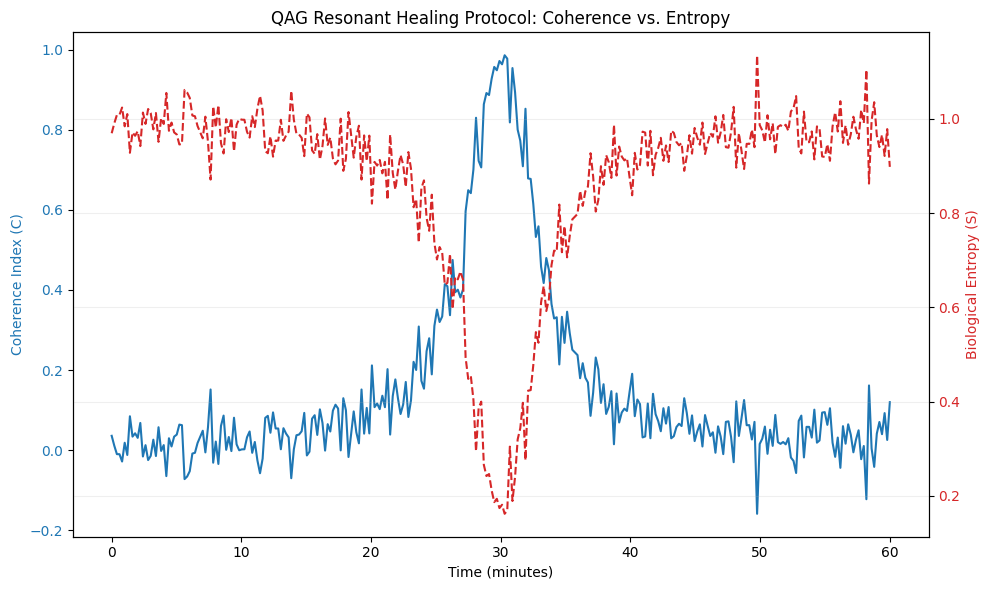

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# --- Biological Parameters ---
def biological_coherence_event(time_steps, resonance_point, quality_factor):
    """
    Simulates a spike in the Coherence Index (C) during a
    Resonant Healing Protocol session.
    """
    # Lorentzian peak representing the resonance event
    c_index = 1 / (1 + quality_factor * (time_steps - resonance_point)**2)
    return c_index + 0.05 * np.random.normal(size=len(time_steps)) # Adding quantum noise

# --- Simulation Setup ---
time = np.linspace(0, 60, 300)  # 60-minute session
c_baseline = biological_coherence_event(time, 30, 0.1) # Peak at 30 mins

# Calculate the coupling effect on local entropy (S)
# According to QAG, as C increases, S must decrease: S = S0 * (1 - alpha_psi * C)
alpha_psi = 0.85
entropy = 1.0 * (1 - alpha_psi * c_baseline)

# --- Visualization ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Coherence Index (C)', color='tab:blue')
ax1.plot(time, c_baseline, color='tab:blue', label='Coherence Index')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Biological Entropy (S)', color='tab:red')
ax2.plot(time, entropy, color='tab:red', linestyle='--', label='System Entropy')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('QAG Resonant Healing Protocol: Coherence vs. Entropy')
fig.tight_layout()
plt.grid(True, alpha=0.2)
plt.show()

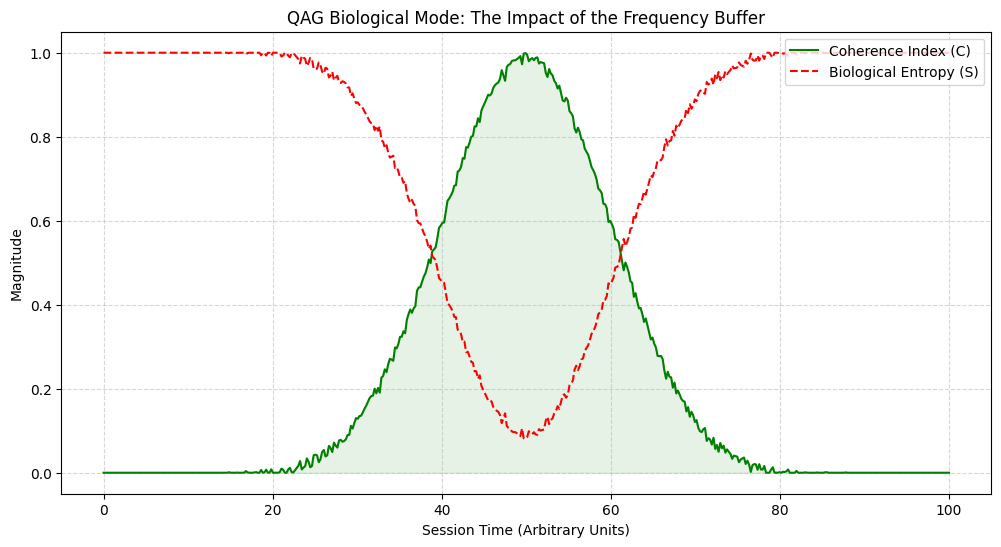

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# --- 1. Environmental Parameters ---
time = np.linspace(0, 100, 500)
# 'Cityscape' Noise: High-frequency EM interference
city_noise = 0.3 * np.sin(2 * np.pi * 0.5 * time) + 0.2 * np.random.normal(size=len(time))

# --- 2. The Frequency Buffer Effect ---
# When Rodney's 'Buffer' is ON, it filters environmental decoherence
buffer_active = True
filtered_noise = city_noise * 0.05 if buffer_active else city_noise

# --- 3. Biological Coherence Calculation ---
# C increases as a function of the Resonant Healing Protocol (RHP)
rhp_signal = np.exp(-(time - 50)**2 / (2 * 10**2))
C_index = rhp_signal - abs(filtered_noise) # Noise subtracts from coherence
C_index = np.clip(C_index, 0, 1)

# --- 4. The Affinity Coupling (alpha_psi) ---
# As C increases, local entropy S drops, facilitating "healing"
alpha_psi = 0.92
S_entropy = 1.0 * (1 - alpha_psi * C_index)

# --- Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(time, C_index, 'g-', label='Coherence Index (C)')
plt.plot(time, S_entropy, 'r--', label='Biological Entropy (S)')
plt.fill_between(time, 0, C_index, color='green', alpha=0.1)

plt.title('QAG Biological Mode: The Impact of the Frequency Buffer')
plt.xlabel('Session Time (Arbitrary Units)')
plt.ylabel('Magnitude')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()